In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn as  nn
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import torch.utils.data as data
import torch
from sklearn.model_selection import train_test_split
import copy
from sklearn.metrics import auc,roc_auc_score, roc_curve

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
def plot_loss(arr,j):
    plt.plot(arr[:2000])
    plt.xlabel("Batch of epoch{}".format(j))
    plt.ylabel("Loss")
    plt.show()

In [4]:
dat = pd.read_csv("train_ZoGVYWq.csv")
dat['residence_area_type'] = dat['residence_area_type'].apply(lambda x: 1 if x =="Urban" else 0)


train_dat = dat.iloc[:,1:-1]

labels = dat.iloc[:,-1]






label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_dat['sourcing_channel'])

train_dat['sourcing_channel'] = integer_encoded


class ImputeScale:
    def __init__(self,train_dat,n_cols):
        self.train_dat = train_dat
        self.n_cols = n_cols
        self.mean = []
        self.max_min = []
        self.fit_train_dat = train_dat.copy()
        self.normalize()
        
        
    def normalize(self):
        import numpy as np
        for i in range(self.n_cols):
            self.mean.append(np.mean(self.train_dat.iloc[:,i]))
            self.max_min.append(np.max(self.train_dat.iloc[:,i])-np.min(self.train_dat.iloc[:,i]))               
            self.fit_train_dat.iloc[:,i]= train_dat.iloc[:,i].apply(lambda x : 0 if np.isnan(x) else (x-self.mean[i])/self.max_min[i] )

            
            
        
        

In [5]:
a = ImputeScale(train_dat,11)

a.fit_train_dat

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,0.114712,-0.226804,0.001620,-0.019129,-0.004599,-0.005455,-0.005919,0.036830,0.2943,0.396604,-0.129668
1,-0.304288,0.090181,0.001178,-0.019129,-0.004599,-0.005455,0.102967,0.174761,-0.2057,0.396604,0.120332
2,0.602712,-0.043956,-0.001382,0.134718,0.171871,0.085454,-0.047220,-0.066619,0.2943,-0.603396,-0.129668
3,-0.265288,-0.117122,0.000462,-0.019129,-0.004599,-0.005455,0.062917,-0.032136,-0.2057,0.396604,-0.022526
4,-0.262288,0.419394,-0.000113,-0.019129,-0.004599,-0.005455,0.100464,0.019588,0.0443,0.396604,-0.022526
5,0.225712,-0.044090,0.000812,0.134718,-0.004599,-0.005455,0.014106,-0.032136,0.0443,-0.603396,0.191760
6,0.685712,0.199863,-0.001002,-0.019129,-0.004599,-0.005455,-0.002164,0.002347,0.0443,0.396604,-0.058240
7,0.685712,0.102375,-0.000317,0.057795,0.348342,0.358181,0.032880,-0.135584,-0.2057,0.396604,-0.022526
8,0.306712,-0.299970,-0.001289,-0.019129,-0.004599,-0.005455,0.064169,-0.118343,-0.2057,0.396604,-0.058240
9,0.593712,0.139025,-0.001127,0.134718,-0.004599,-0.005455,-0.019686,0.002347,-0.2057,-0.603396,-0.093954


In [6]:
x_train,x_test, y_train, y_test= train_test_split(a.fit_train_dat, labels, test_size=0.33, random_state=42)
transformed_dat = np.array(x_train)
transformed_dat = torch.Tensor(transformed_dat)
transformed_labels = (np.array(y_train).reshape((-1,1)))
transformed_labels = torch.Tensor(transformed_labels)
torch_train_data = torch.utils.data.TensorDataset(transformed_dat,transformed_labels )


dloader = data.DataLoader(torch_train_data, batch_size=20,
                                             shuffle=True, num_workers=4)

In [7]:
transformed_dat_val = np.array(x_test)
transformed_dat_val= torch.Tensor(transformed_dat_val)
transformed_labels_val= (np.array(y_test).reshape((-1,1)))
transformed_labels_val = torch.Tensor(transformed_labels_val)
torch_train_data_val = torch.utils.data.TensorDataset(transformed_dat_val,transformed_labels_val)


dloader_val = data.DataLoader(torch_train_data_val, batch_size=len(transformed_dat_val),
                                             shuffle=True, num_workers=4)
val_data, val_labels = next(iter(dloader_val))
val_data = Variable(val_data.view(-1,1,11)).cuda()
val_labels = Variable(val_labels).cuda()

In [8]:
class trainer(nn.Module):
    def __init__(self):
        super(trainer,self).__init__()
        self.conv1 = nn.Conv1d(in_channels= 1, out_channels= 16, kernel_size=1)
        self.LRelu1 = nn.LeakyReLU()
        self.conv2 = nn.Conv1d(in_channels= 16, out_channels= 16*2, kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels= 16*2, out_channels= 16*4, kernel_size=2)
        self.conv4 = nn.Conv1d(in_channels= 16*4, out_channels= 16*8, kernel_size=2)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(16*8*8,1)
        self.Sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        out = self.conv1(x)
        out = self.LRelu1(out)
        out = self.conv2(out)
        out = self.tanh(out)
        out = self.conv3(out)
        out = self.tanh(out)
        out = self.conv4(out)
        out = self.tanh(out)
        out = self.fc1(out.view(-1,16*8*8))
        out = self.Sigmoid(out)
        return out

epoch0  test accuracy is 94.16106128550075 and val accuracy is [93.84487] 


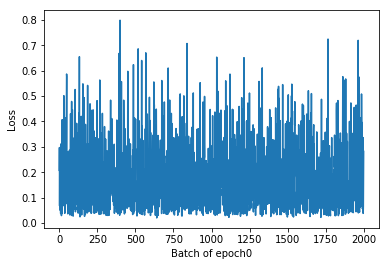

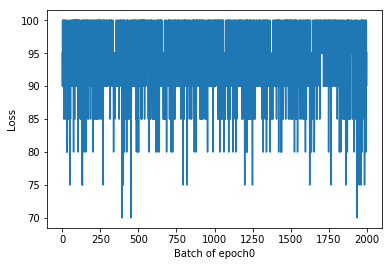

epoch1  test accuracy is 94.10313901345292 and val accuracy is [93.79933] 


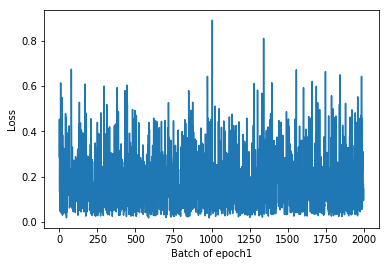

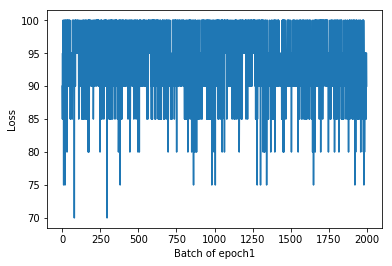

epoch2  test accuracy is 94.14050822122572 and val accuracy is [93.8221] 


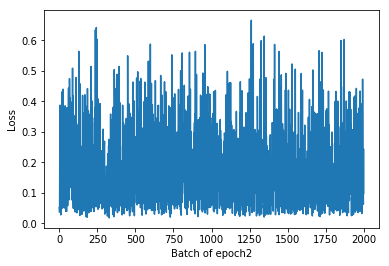

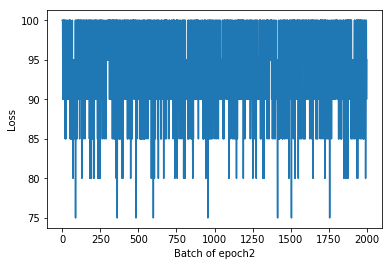

epoch3  test accuracy is 94.15545590433483 and val accuracy is [93.776566] 


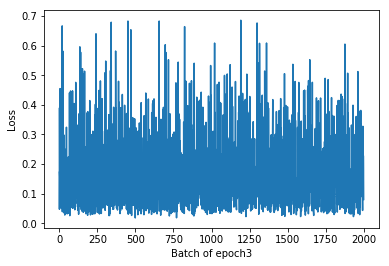

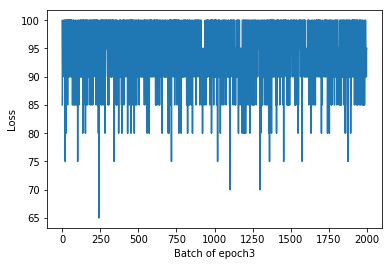

epoch4  test accuracy is 94.10687593423019 and val accuracy is [93.723434] 


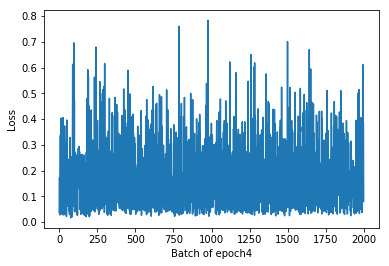

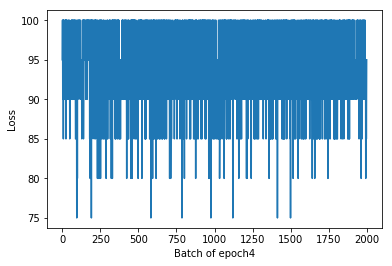

epoch5  test accuracy is 94.14985052316891 and val accuracy is [93.75379] 


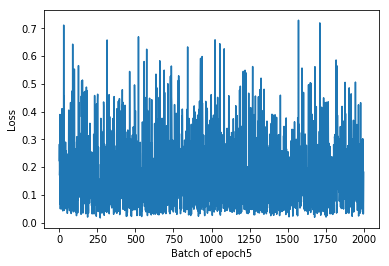

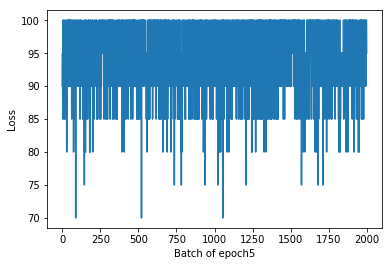

epoch6  test accuracy is 94.13863976083707 and val accuracy is [93.79933] 


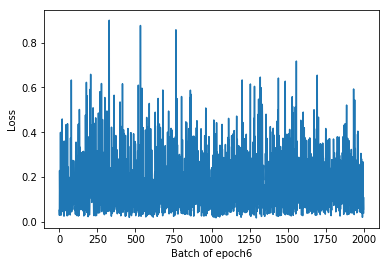

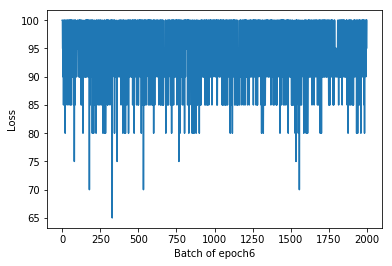

epoch7  test accuracy is 94.13303437967114 and val accuracy is [93.75379] 


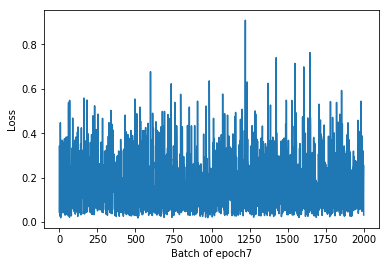

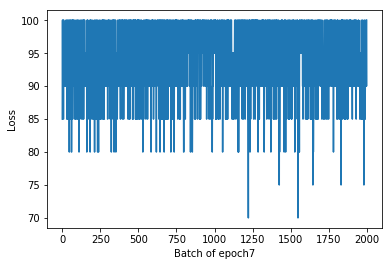

epoch8  test accuracy is 94.13677130044843 and val accuracy is [93.76138] 


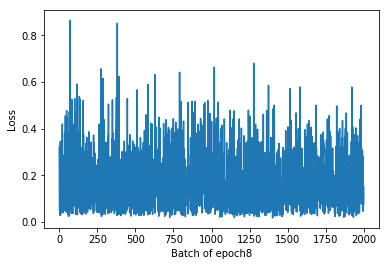

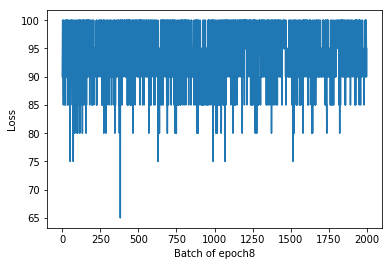

epoch9  test accuracy is 94.14798206278027 and val accuracy is [93.772766] 


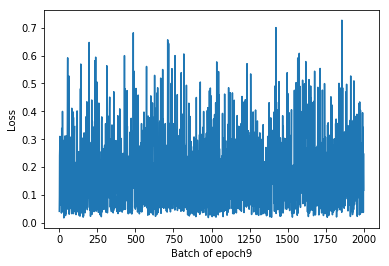

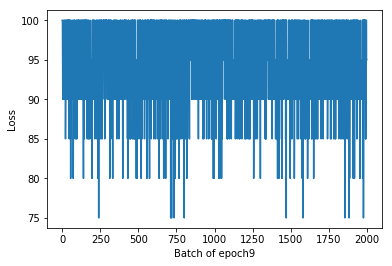

epoch10  test accuracy is 94.14798206278027 and val accuracy is [93.79554] 


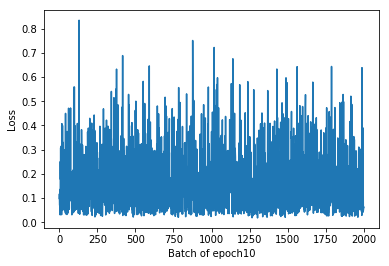

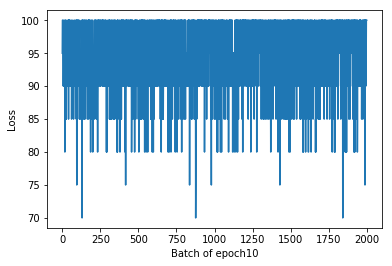

epoch11  test accuracy is 94.08819133034379 and val accuracy is [93.76518] 


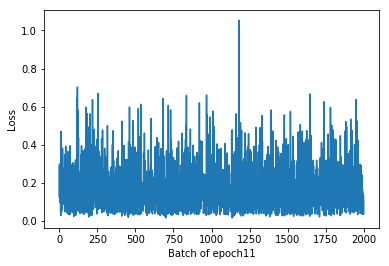

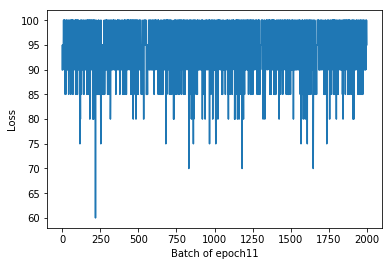

epoch12  test accuracy is 94.06576980568012 and val accuracy is [93.810715] 


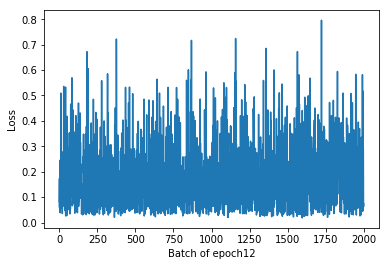

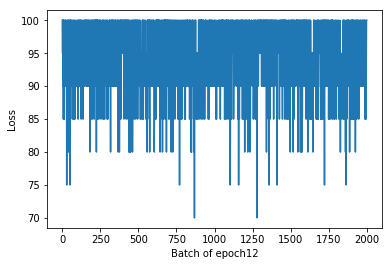

epoch13  test accuracy is 94.14050822122572 and val accuracy is [93.78036] 


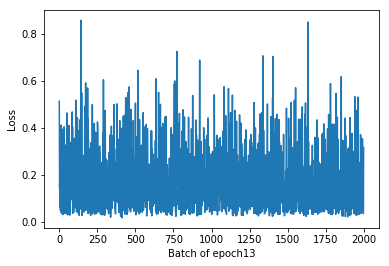

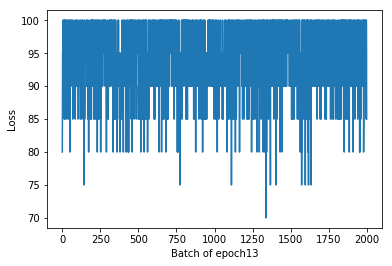

epoch14  test accuracy is 94.14050822122572 and val accuracy is [93.78795] 


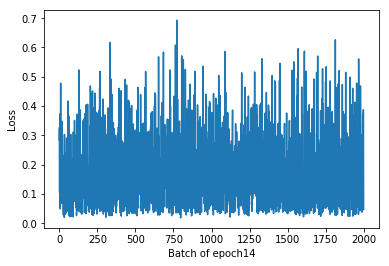

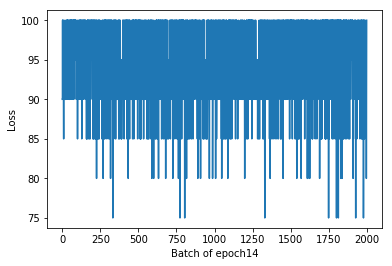

epoch15  test accuracy is 94.14611360239162 and val accuracy is [93.73862] 


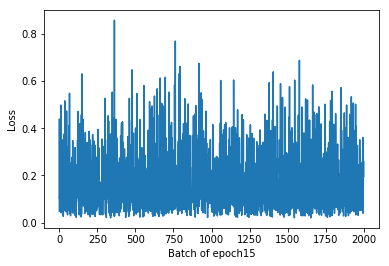

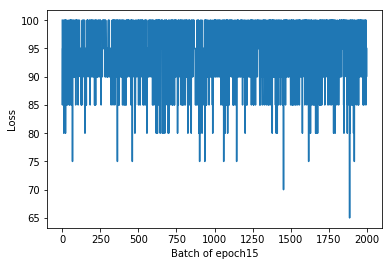

epoch16  test accuracy is 94.11434977578476 and val accuracy is [93.78416] 


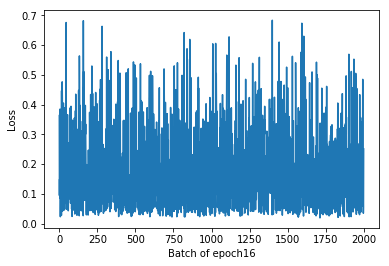

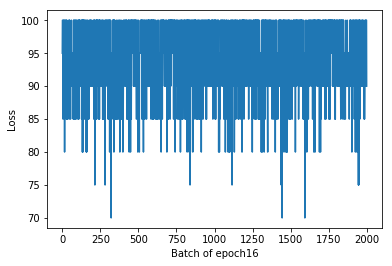

epoch17  test accuracy is 94.13303437967114 and val accuracy is [93.80312] 


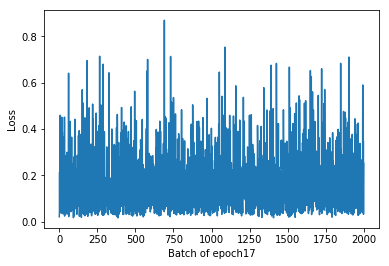

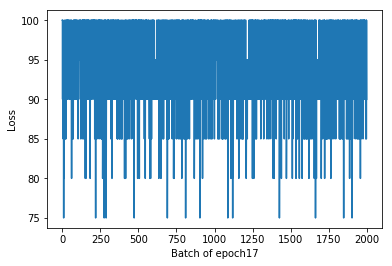

epoch18  test accuracy is 94.13863976083707 and val accuracy is [93.79554] 


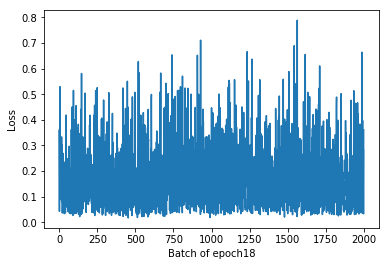

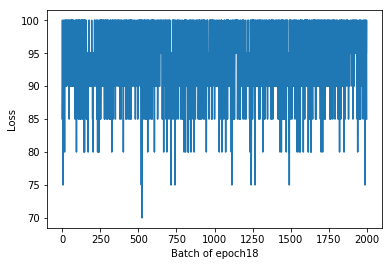

epoch19  test accuracy is 94.13116591928251 and val accuracy is [93.810715] 


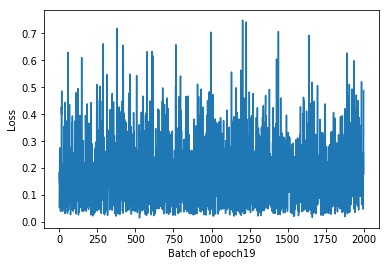

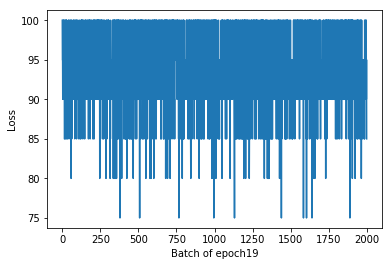

epoch20  test accuracy is 94.13303437967114 and val accuracy is [93.76518] 


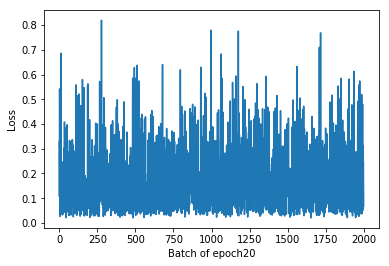

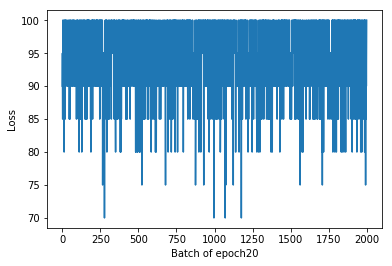

epoch21  test accuracy is 94.11434977578476 and val accuracy is [93.76138] 


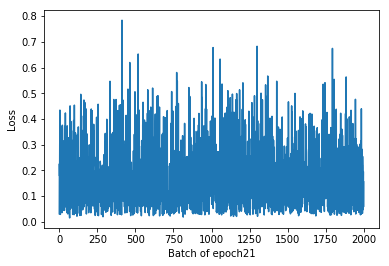

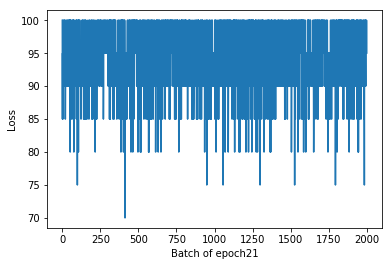

epoch22  test accuracy is 94.13677130044843 and val accuracy is [93.814514] 


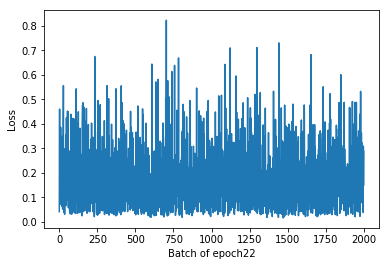

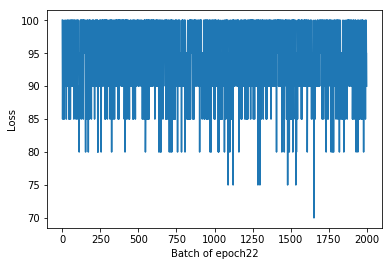

epoch23  test accuracy is 94.15919282511211 and val accuracy is [93.78416] 


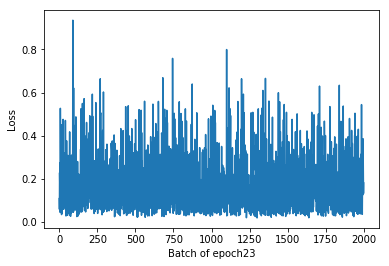

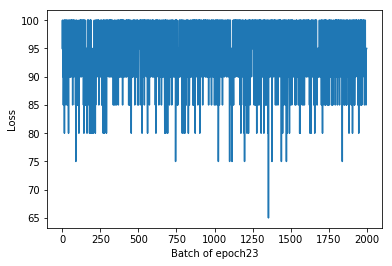

epoch24  test accuracy is 94.14985052316891 and val accuracy is [93.78795] 


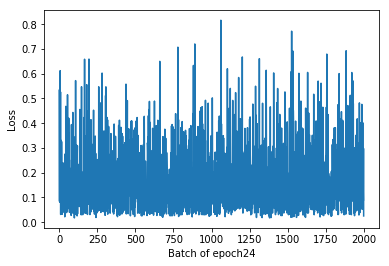

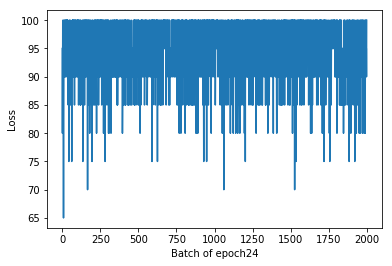

epoch25  test accuracy is 94.16666666666667 and val accuracy is [93.74241] 


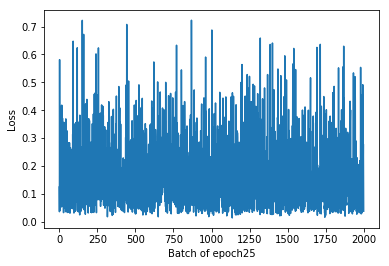

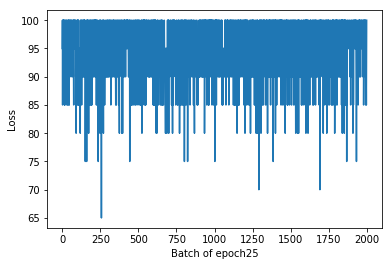

epoch26  test accuracy is 94.14050822122572 and val accuracy is [93.80692] 


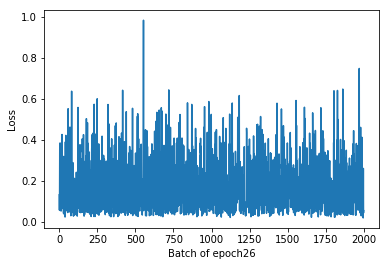

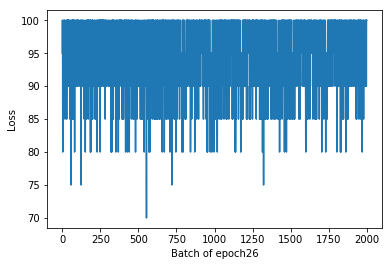

epoch27  test accuracy is 94.08258594917788 and val accuracy is [93.73862] 


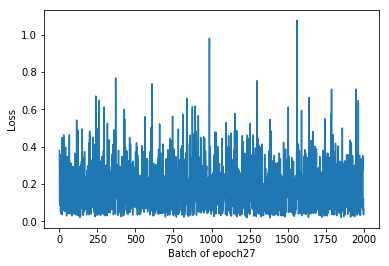

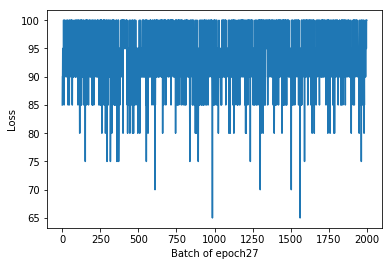

epoch28  test accuracy is 94.11434977578476 and val accuracy is [93.78036] 


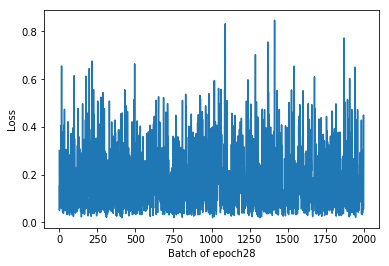

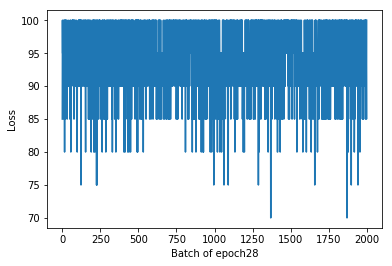

epoch29  test accuracy is 94.1162182361734 and val accuracy is [93.79174] 


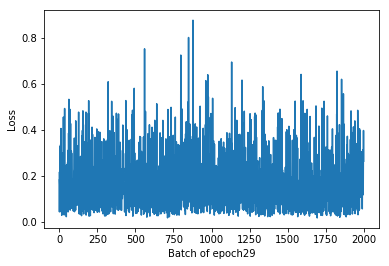

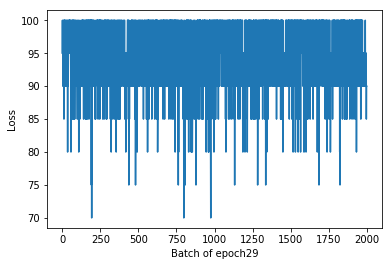

epoch30  test accuracy is 94.1535874439462 and val accuracy is [93.79933] 


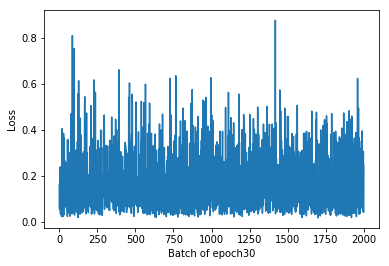

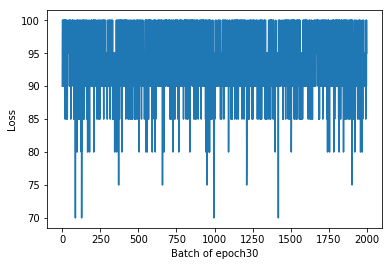

epoch31  test accuracy is 94.12556053811659 and val accuracy is [93.8221] 


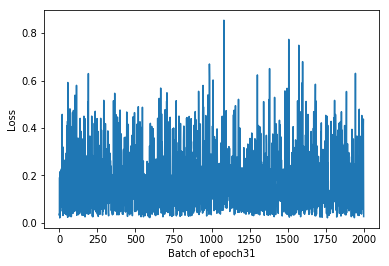

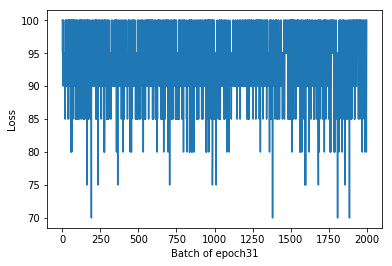

epoch32  test accuracy is 94.17040358744394 and val accuracy is [93.76518] 


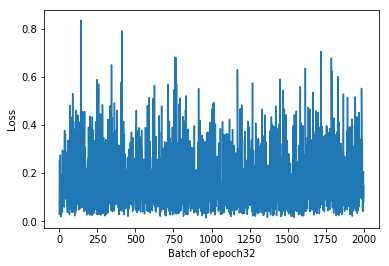

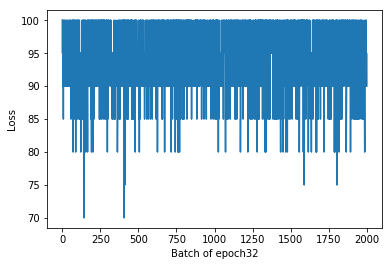

epoch33  test accuracy is 94.12742899850524 and val accuracy is [93.80692] 


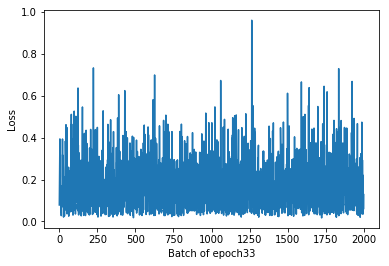

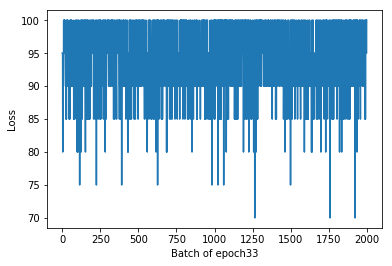

epoch34  test accuracy is 94.12929745889387 and val accuracy is [93.8259] 


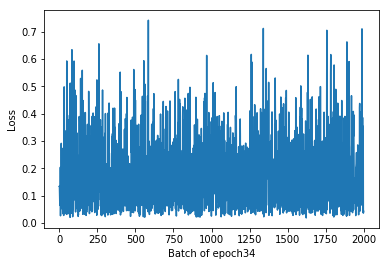

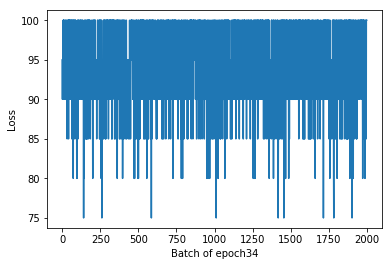

epoch35  test accuracy is 94.12182361733932 and val accuracy is [93.8259] 


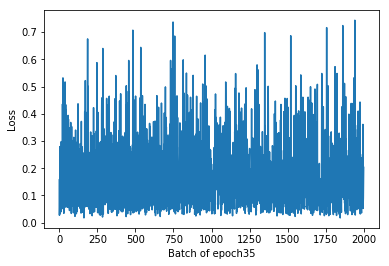

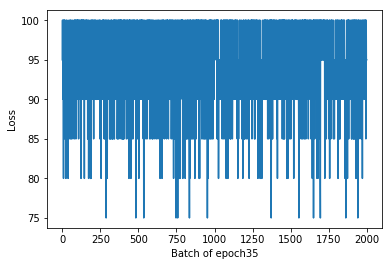

epoch36  test accuracy is 94.12742899850524 and val accuracy is [93.810715] 


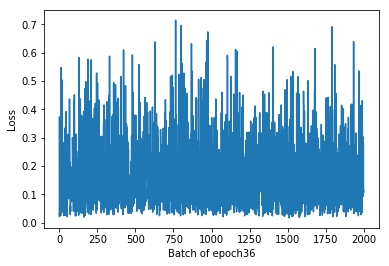

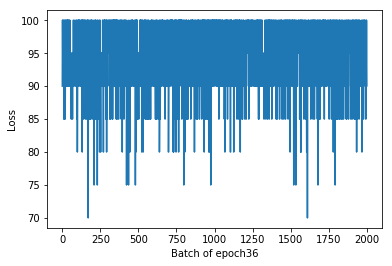

epoch37  test accuracy is 94.11248131539611 and val accuracy is [93.79554] 


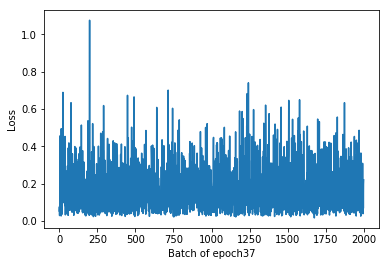

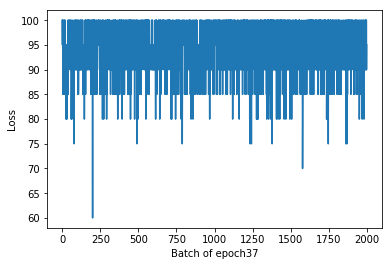

epoch38  test accuracy is 94.1535874439462 and val accuracy is [93.78036] 


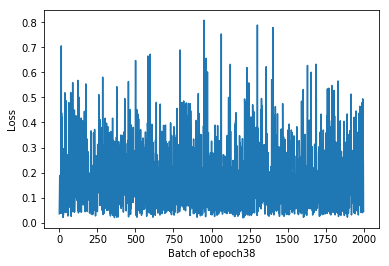

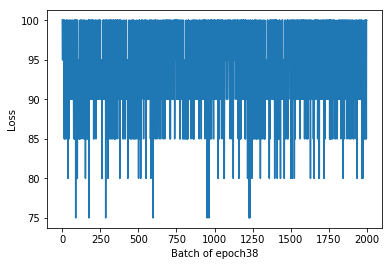

epoch39  test accuracy is 94.12369207772795 and val accuracy is [93.78795] 


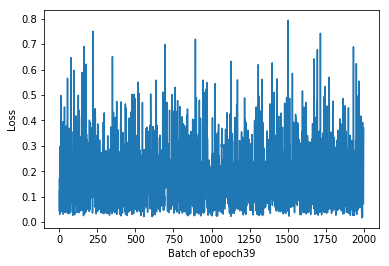

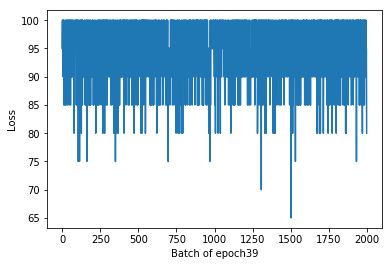

epoch40  test accuracy is 94.11434977578476 and val accuracy is [93.78036] 


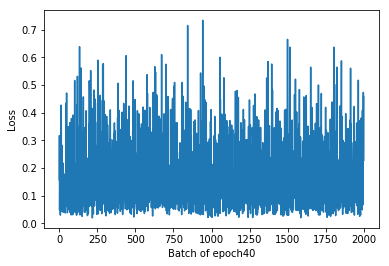

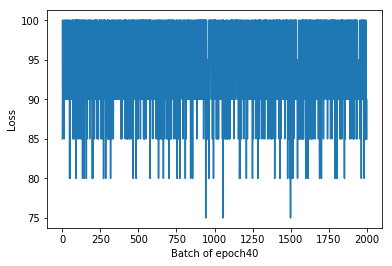

epoch41  test accuracy is 94.11061285500747 and val accuracy is [93.810715] 


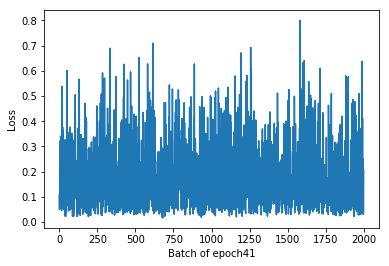

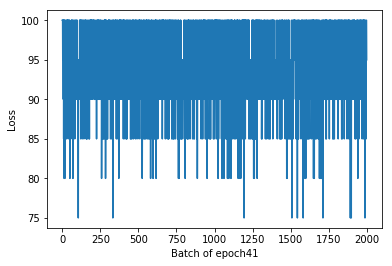

epoch42  test accuracy is 94.12742899850524 and val accuracy is [93.74241] 


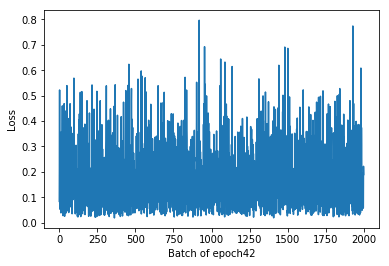

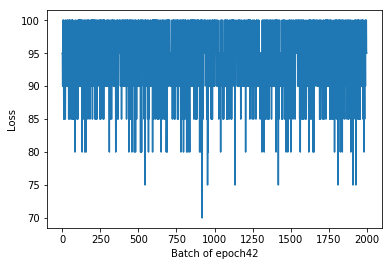

epoch43  test accuracy is 94.1778774289985 and val accuracy is [93.74241] 


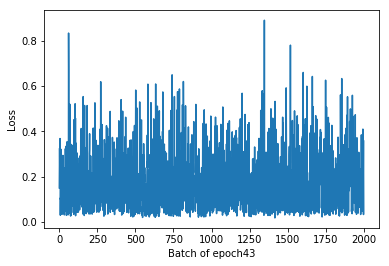

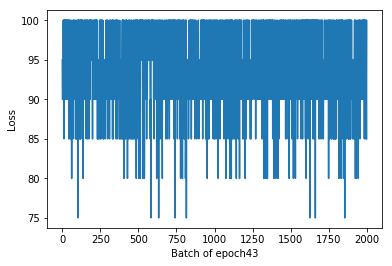

epoch44  test accuracy is 94.11248131539611 and val accuracy is [93.810715] 


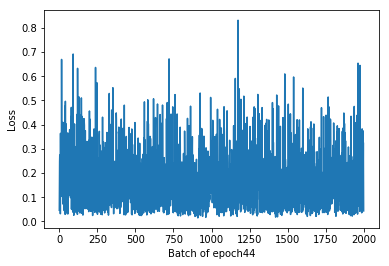

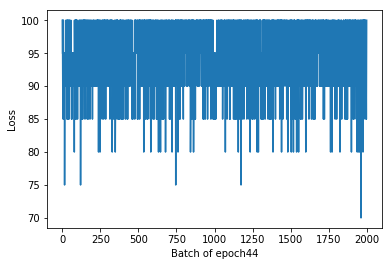

epoch45  test accuracy is 94.14985052316891 and val accuracy is [93.75] 


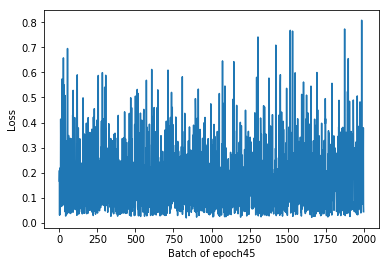

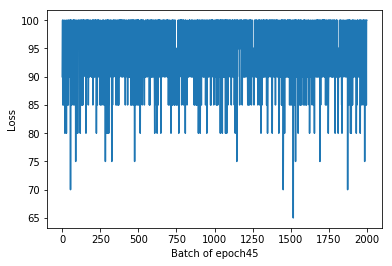

epoch46  test accuracy is 94.13863976083707 and val accuracy is [93.75] 


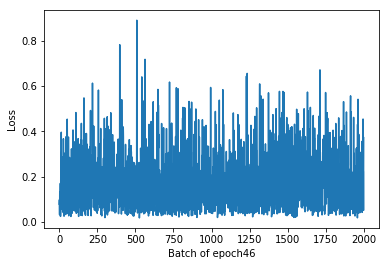

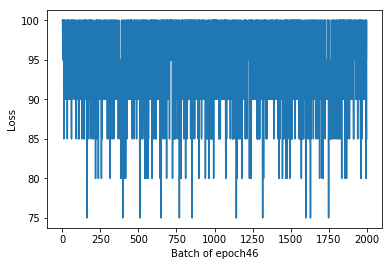

epoch47  test accuracy is 94.14237668161435 and val accuracy is [93.776566] 


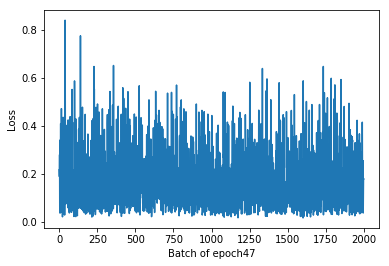

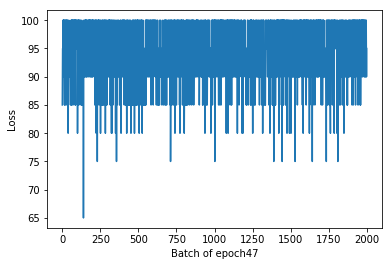

epoch48  test accuracy is 94.1535874439462 and val accuracy is [93.78036] 


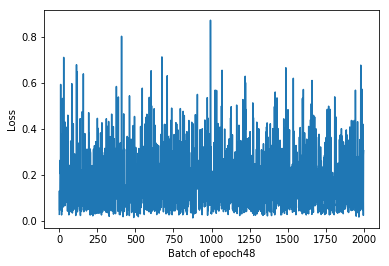

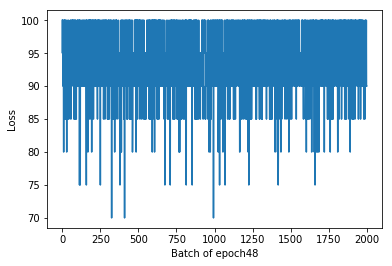

epoch49  test accuracy is 94.12369207772795 and val accuracy is [93.772766] 


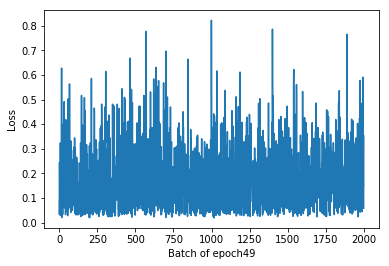

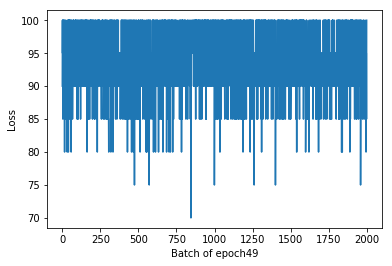

epoch50  test accuracy is 94.13303437967114 and val accuracy is [93.78795] 


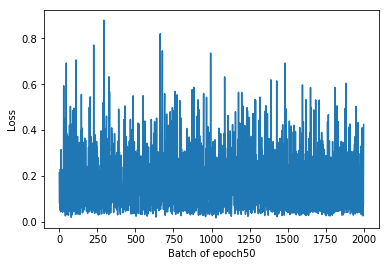

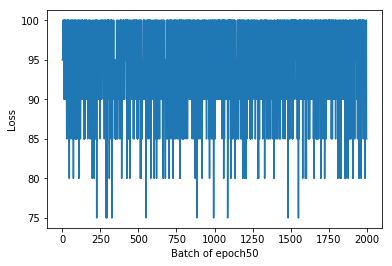

epoch51  test accuracy is 94.11995515695067 and val accuracy is [93.73482] 


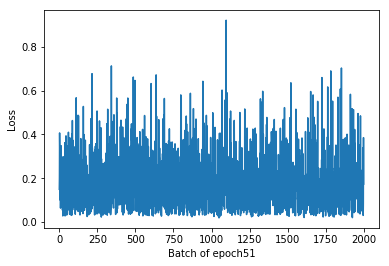

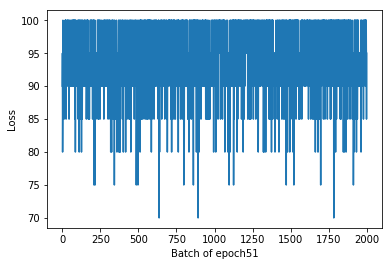

epoch52  test accuracy is 94.14985052316891 and val accuracy is [93.79554] 


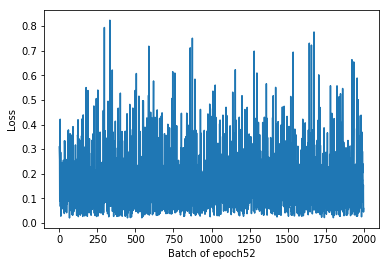

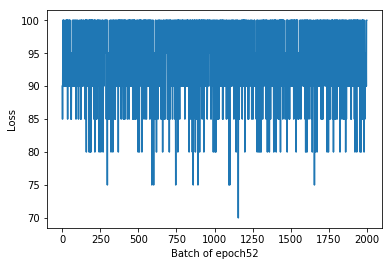

epoch53  test accuracy is 94.0788490284006 and val accuracy is [93.71964] 


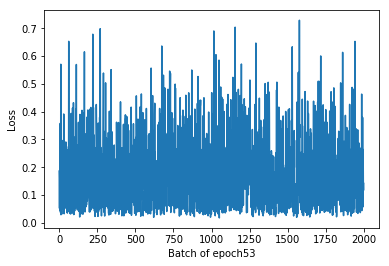

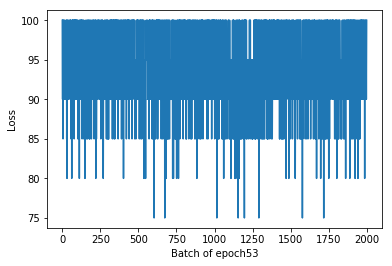

epoch54  test accuracy is 94.11434977578476 and val accuracy is [93.78416] 


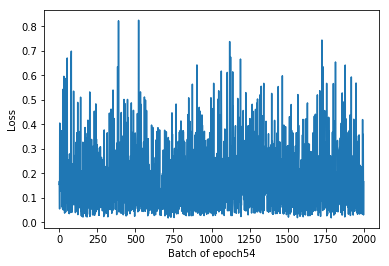

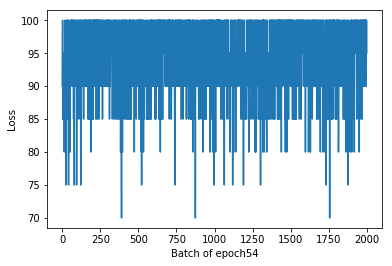

epoch55  test accuracy is 94.14611360239162 and val accuracy is [93.75759] 


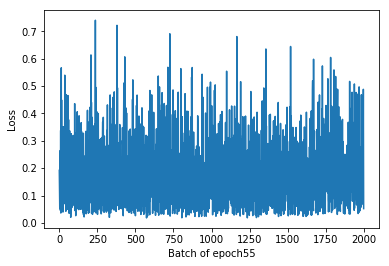

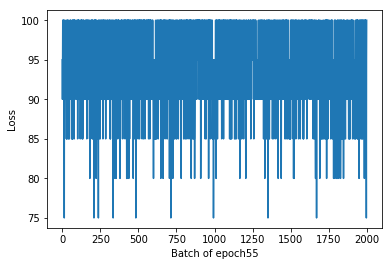

epoch56  test accuracy is 94.12369207772795 and val accuracy is [93.74621] 


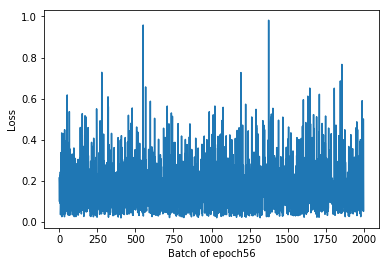

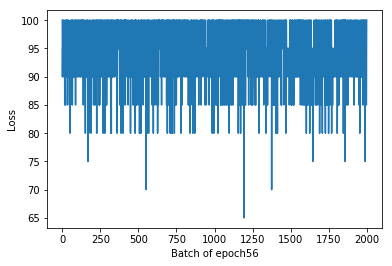

epoch57  test accuracy is 94.14985052316891 and val accuracy is [93.772766] 


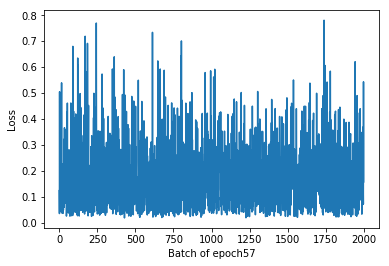

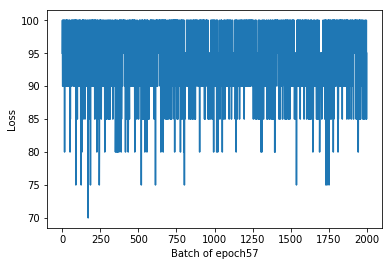

epoch58  test accuracy is 94.14237668161435 and val accuracy is [93.73482] 


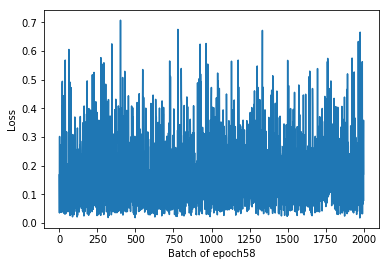

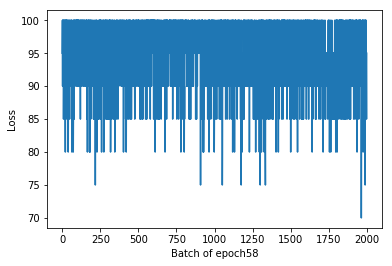

epoch59  test accuracy is 94.15171898355754 and val accuracy is [93.79933] 


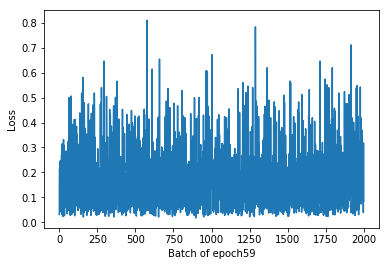

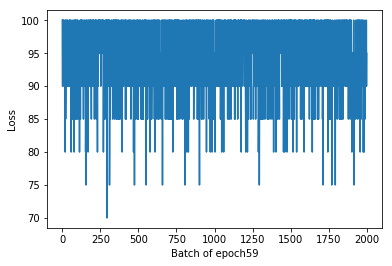

epoch60  test accuracy is 94.11995515695067 and val accuracy is [93.810715] 


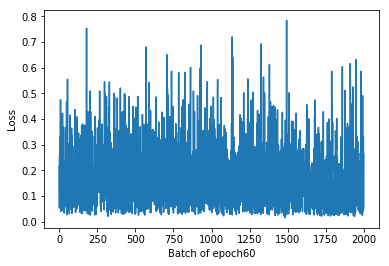

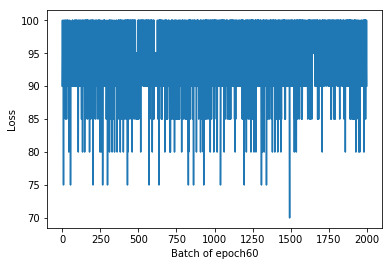

epoch61  test accuracy is 94.13677130044843 and val accuracy is [93.71964] 


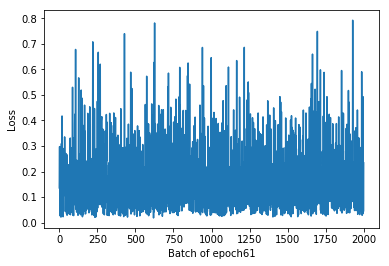

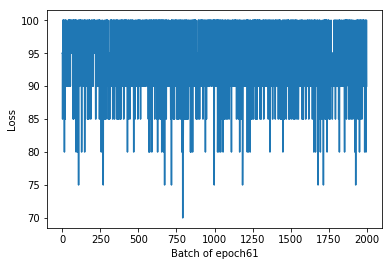

epoch62  test accuracy is 94.12556053811659 and val accuracy is [93.71584] 


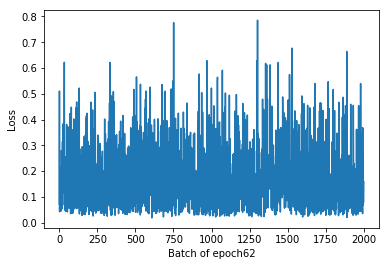

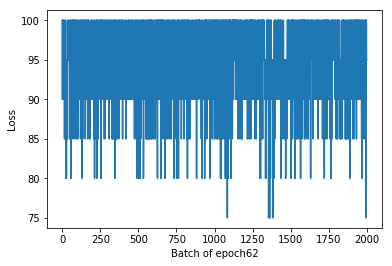

epoch63  test accuracy is 94.12556053811659 and val accuracy is [93.856255] 


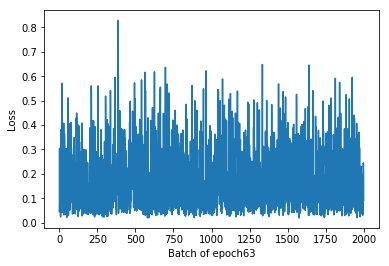

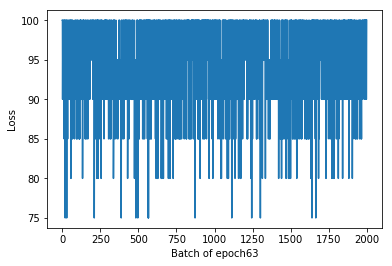

epoch64  test accuracy is 94.1778774289985 and val accuracy is [93.76518] 


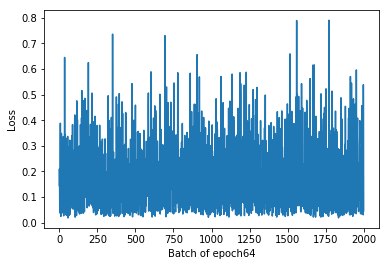

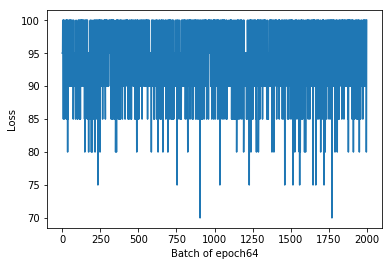

epoch65  test accuracy is 94.1349028400598 and val accuracy is [93.76518] 


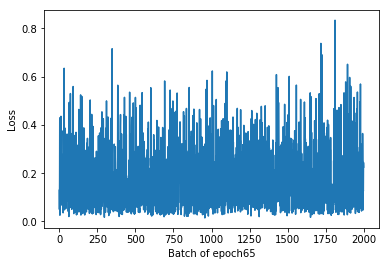

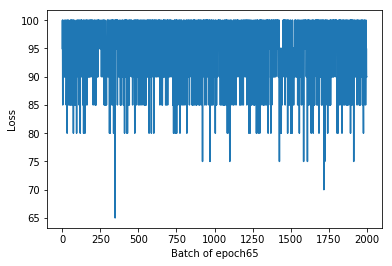

epoch66  test accuracy is 94.14611360239162 and val accuracy is [93.79554] 


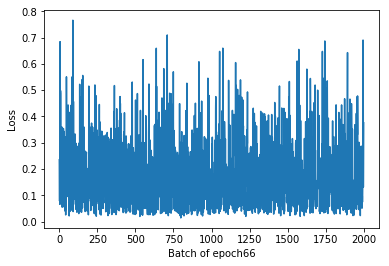

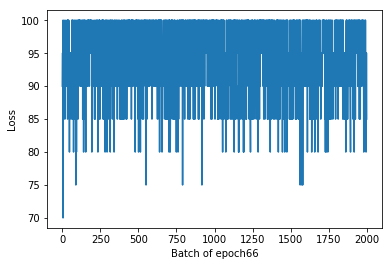

epoch67  test accuracy is 94.12929745889387 and val accuracy is [93.727234] 


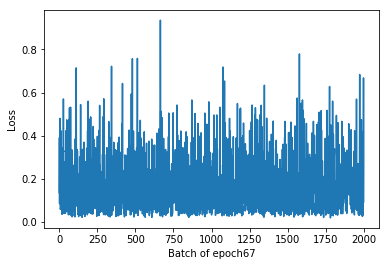

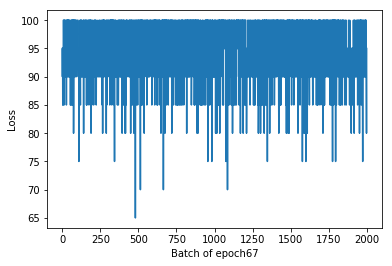

epoch68  test accuracy is 94.14424514200299 and val accuracy is [93.731026] 


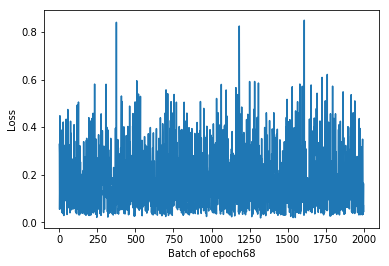

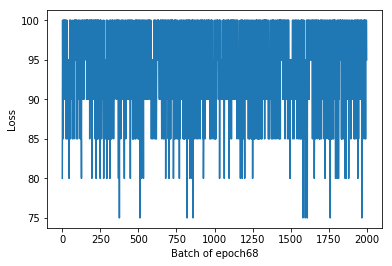

epoch69  test accuracy is 94.13677130044843 and val accuracy is [93.83728] 


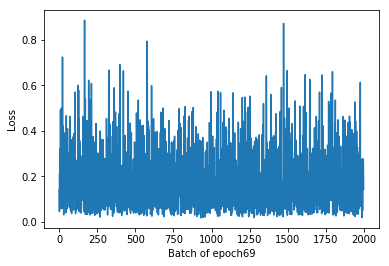

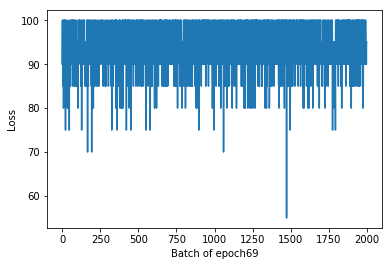

epoch70  test accuracy is 94.14611360239162 and val accuracy is [93.731026] 


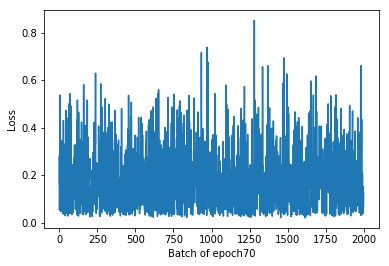

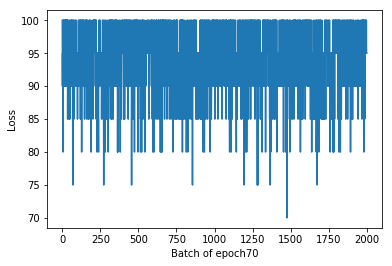

epoch71  test accuracy is 94.13863976083707 and val accuracy is [93.75] 


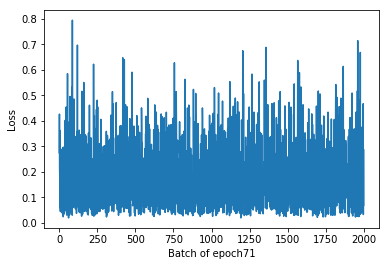

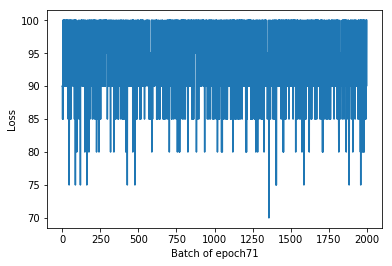

epoch72  test accuracy is 94.14237668161435 and val accuracy is [93.79174] 


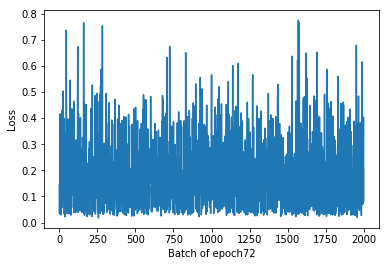

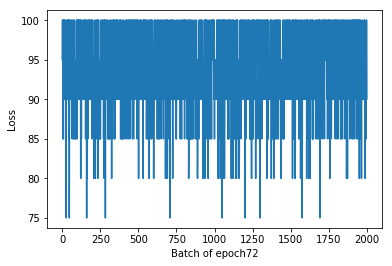

epoch73  test accuracy is 94.16106128550075 and val accuracy is [93.75379] 


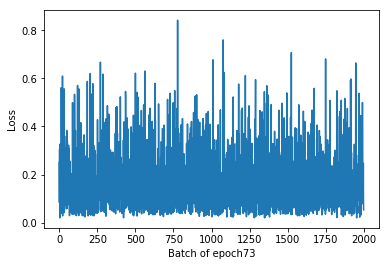

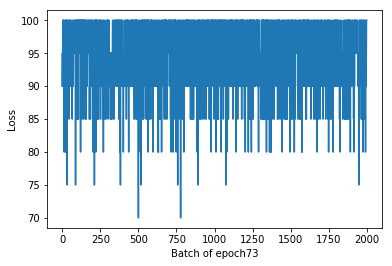

epoch74  test accuracy is 94.13116591928251 and val accuracy is [93.70446] 


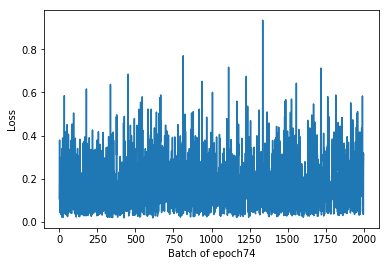

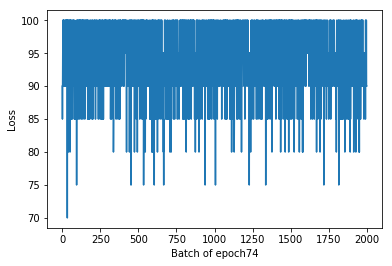

epoch75  test accuracy is 94.14237668161435 and val accuracy is [93.76518] 


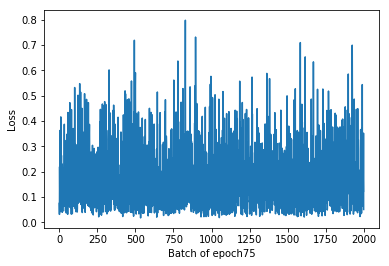

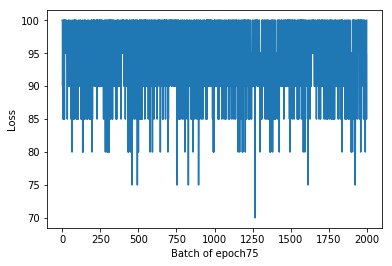

epoch76  test accuracy is 94.11808669656203 and val accuracy is [93.73482] 


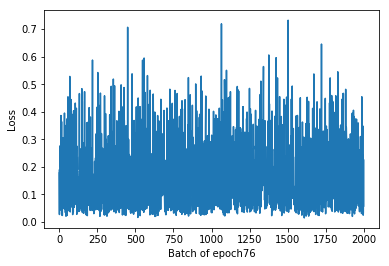

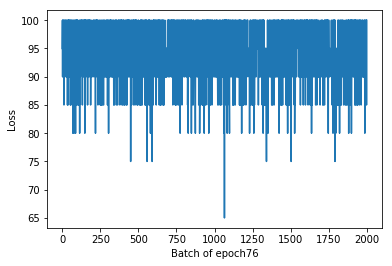

epoch77  test accuracy is 94.17227204783259 and val accuracy is [93.772766] 


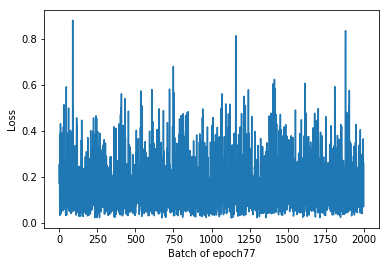

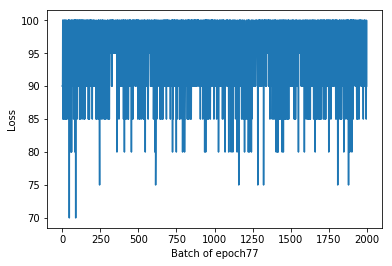

epoch78  test accuracy is 94.1535874439462 and val accuracy is [93.80312] 


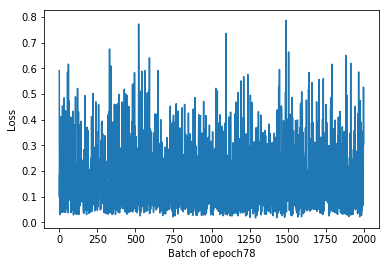

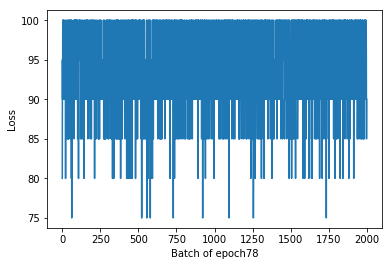

epoch79  test accuracy is 94.11808669656203 and val accuracy is [93.6058] 


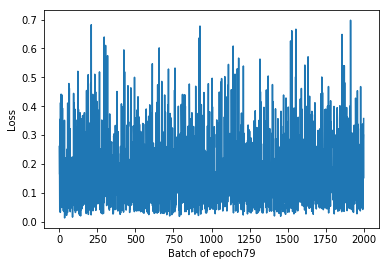

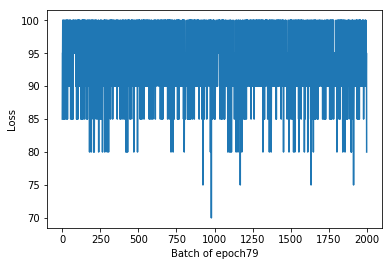

epoch80  test accuracy is 94.1349028400598 and val accuracy is [93.80312] 


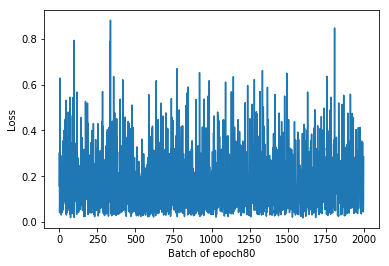

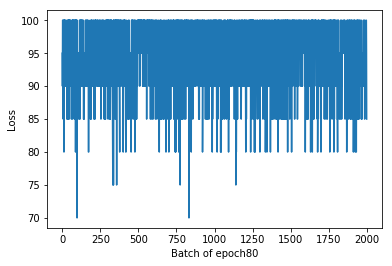

epoch81  test accuracy is 94.16106128550075 and val accuracy is [93.75759] 


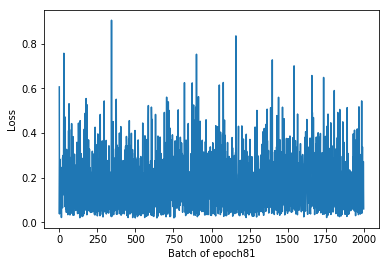

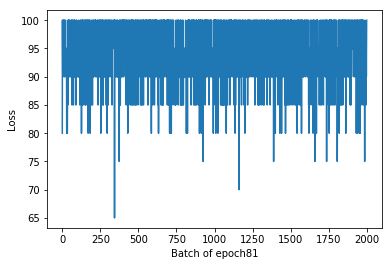

epoch82  test accuracy is 94.13677130044843 and val accuracy is [93.8221] 


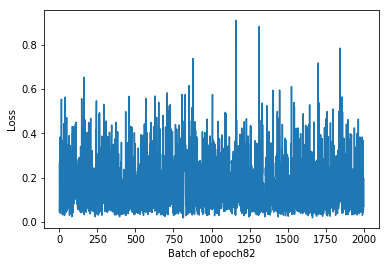

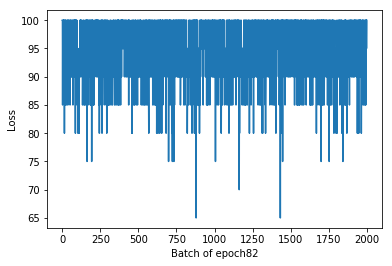

epoch83  test accuracy is 94.14611360239162 and val accuracy is [93.76138] 


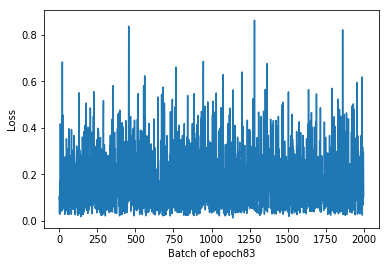

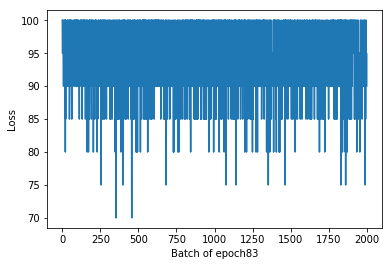

epoch84  test accuracy is 94.12929745889387 and val accuracy is [93.768974] 


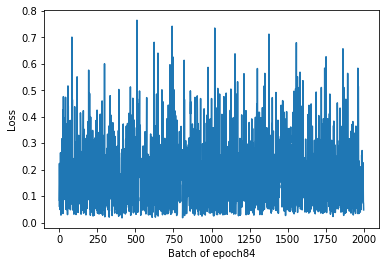

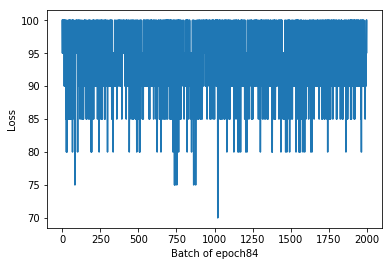

epoch85  test accuracy is 94.13863976083707 and val accuracy is [93.79554] 


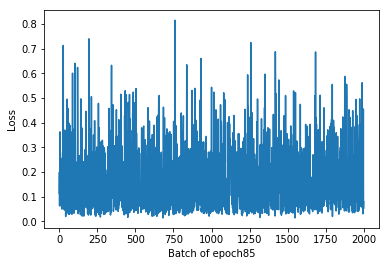

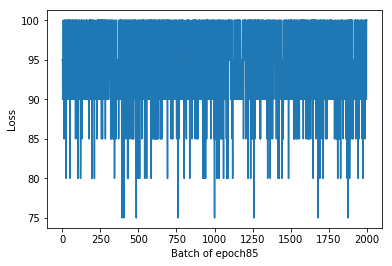

epoch86  test accuracy is 94.1685351270553 and val accuracy is [93.727234] 


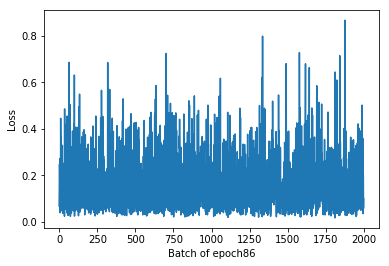

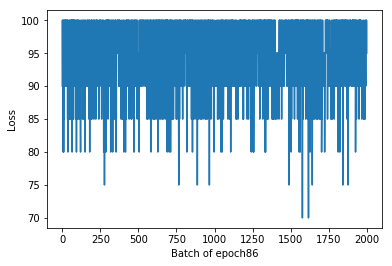

epoch87  test accuracy is 94.13116591928251 and val accuracy is [93.731026] 


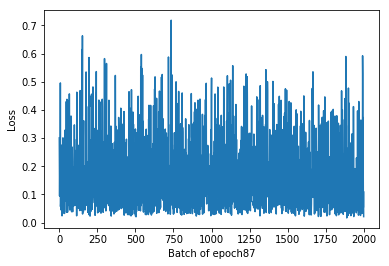

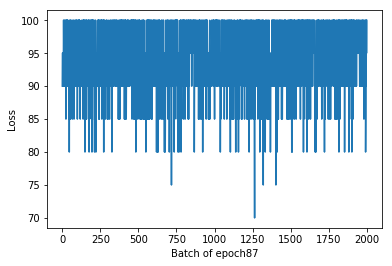

epoch88  test accuracy is 94.13303437967114 and val accuracy is [93.79933] 


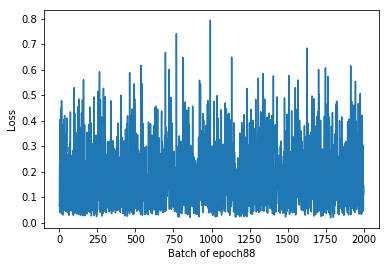

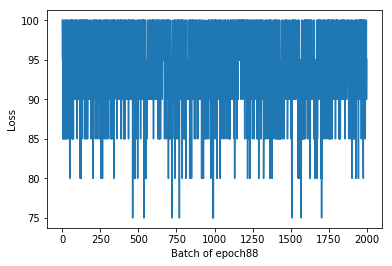

epoch89  test accuracy is 94.1349028400598 and val accuracy is [93.78036] 


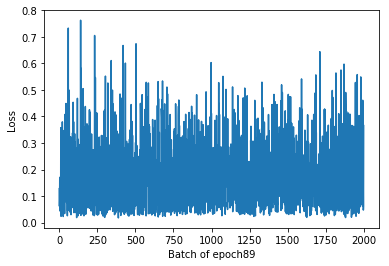

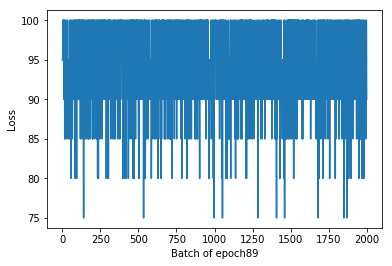

epoch90  test accuracy is 94.1349028400598 and val accuracy is [93.78036] 


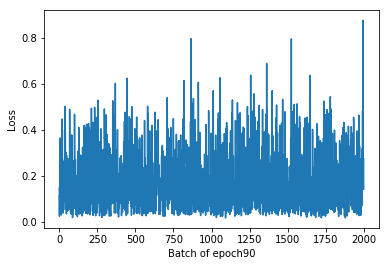

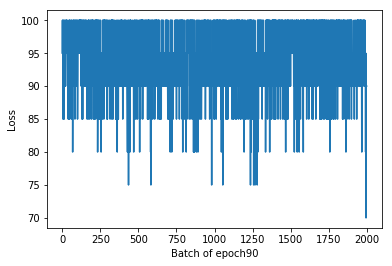

epoch91  test accuracy is 94.13677130044843 and val accuracy is [93.814514] 


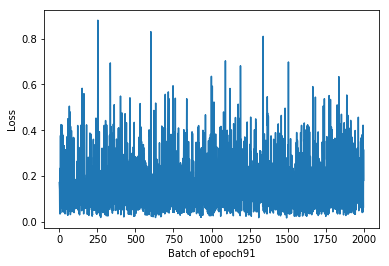

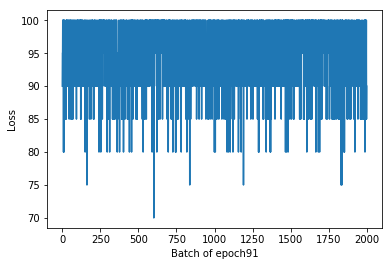

epoch92  test accuracy is 94.17414050822123 and val accuracy is [93.76138] 


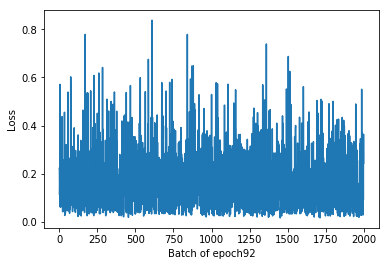

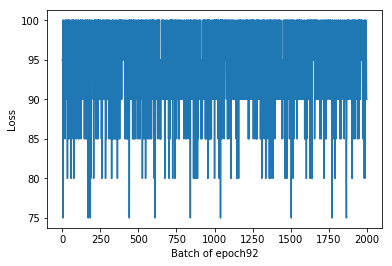

epoch93  test accuracy is 94.15545590433483 and val accuracy is [93.76138] 


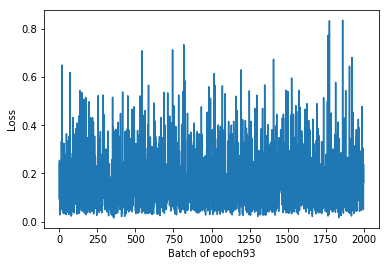

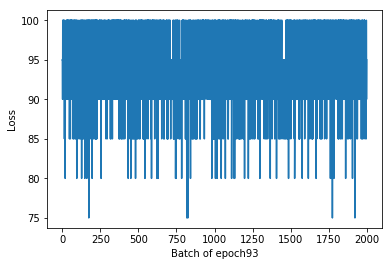

epoch94  test accuracy is 94.12369207772795 and val accuracy is [93.76138] 


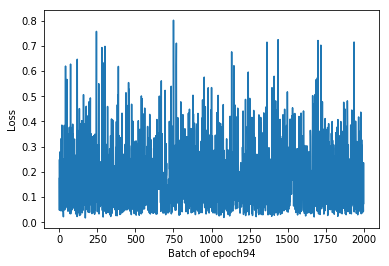

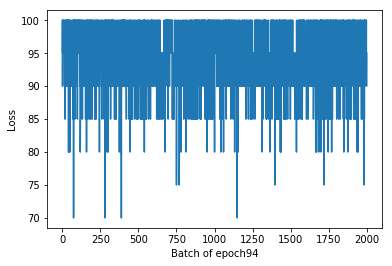

epoch95  test accuracy is 94.15545590433483 and val accuracy is [93.76518] 


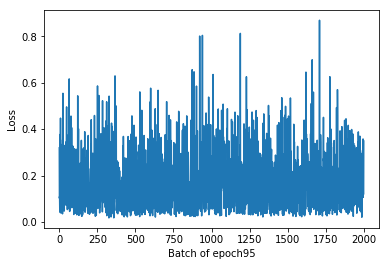

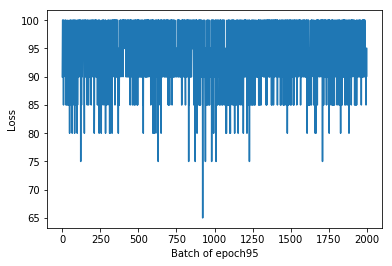

epoch96  test accuracy is 94.15732436472346 and val accuracy is [93.818306] 


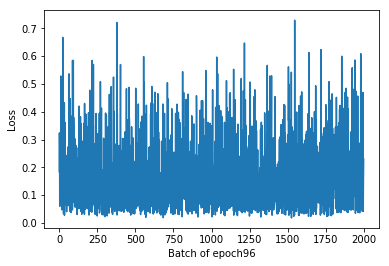

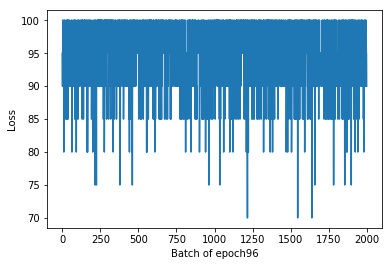

epoch97  test accuracy is 94.14050822122572 and val accuracy is [93.79174] 


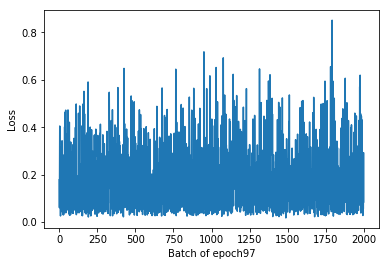

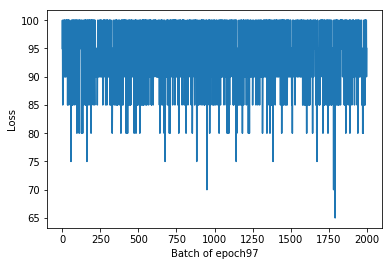

epoch98  test accuracy is 94.15171898355754 and val accuracy is [93.75379] 


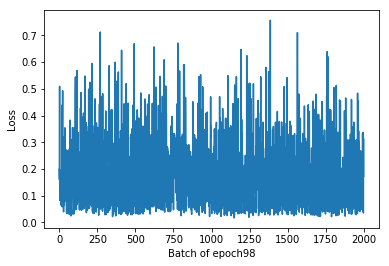

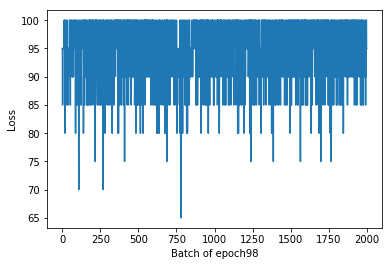

epoch99  test accuracy is 94.16292974588939 and val accuracy is [93.73482] 


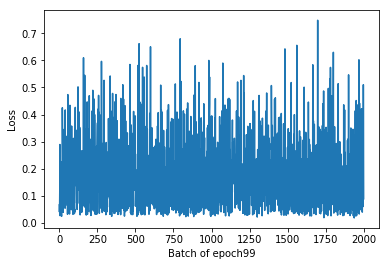

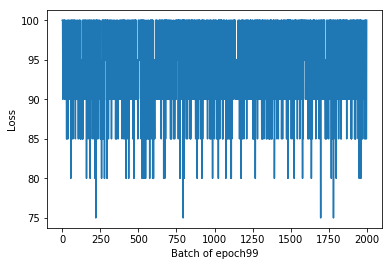

In [61]:
load_network  = True
net = trainer()


net = net.cuda()
criterion = nn.BCELoss()
learn_r = 0.005
#optim = torch.optim.Adam(net.parameters(), lr=learn_r)
optim = torch.optim.SGD(net.parameters(), lr=learn_r)

    

n = len(dloader.dataset)

prev_acc = 0

if load_network: 
    net.load_state_dict( torch.load("best_model.pth")['state_dict'])
    optim.load_state_dict(torch.load("best_model.pth")['optimizer'])
    
#val_data = Variable(val_data.view(-1,1,11)).cuda()
for j in range(100):
    accuracy = 0
    arr = []
    acc = []

    for i, (dat, lab) in enumerate(dloader):
        V_dat = Variable(dat.view(-1,1,11))
        V_lab = Variable(lab)
        V_dat = V_dat.cuda()
        V_lab = V_lab.cuda()
        
        optim.zero_grad()
        output = net(V_dat)
        loss = criterion(1-output, V_lab )
        pred_labels =   (1-output)>0.5
        
        loss.backward() # Getting gradients
        optim.step() # Updating parameters
        
        accuracy = np.int(sum(pred_labels.float()==V_lab).data.cpu().numpy())*100/V_lab.size(0)
        acc.append(accuracy)
        arr.append(loss.data.cpu().numpy())
    
    val_output = net(val_data)
    val_pred= ((1- val_output) > 0.5).float()
    val_acc = sum(1-torch.abs(val_pred.data - val_labels.data)).cpu().numpy()*100/val_labels.size(0)
    print("epoch{}  test accuracy is {} and val accuracy is {} ".format(j,np.mean(acc),val_acc))
    if np.mean(acc)> prev_acc:
        prev_acc = np.mean(acc)
        best_model = copy.deepcopy(net.state_dict())
        torch.save({
            'epoch': j + 1,
            'state_dict': net.state_dict(),
            'optimizer' : optim.state_dict(),
        }, "best_model.pth")
    plot_loss(arr,j)
    plot_loss(acc,j)

In [65]:
 fpr ,tpr, threshold = roc_curve(y_test,val_output.data.cpu().numpy()) 
auc(fpr, tpr)


In [ ]:
test_dat = pd.read_csv("test_66516Ee.csv")
test_dat['residence_area_type'] = test_dat['residence_area_type'].apply(lambda x: 1 if x =="Urban" else 0)
test_dat['sourcing_channel'] = label_encoder.transform(test_dat['sourcing_channel'])
test_dat = test_dat.iloc[:,1:]

b =  ImputeScale(test_dat[1:],11)
b.fit_train_dat['residence_area_type'] = test_dat['residence_area_type']


transformed_dat_test = np.array(b.fit_train_dat)
transformed_dat_test = torch.Tensor(transformed_dat_test)
#transformed_labels_test = (np.array(labels).reshape((-1,1)))
#transformed_labels_test = torch.Tensor(transformed_labels)
#torch_train_data_test = torch.utils.data.TensorDataset(transformed_dat_test)
dloader_test = data.DataLoader(transformed_dat_test, batch_size=len(transformed_dat_test),
                                             shuffle=True, num_workers=4)
test_dat_load = next(iter(dloader_test))
V_dat_test = Variable(test_dat.view(-1,1,11))
output = 1-net(V_dat_test)